# Logistics
Assignment 3 - Part 3

Name: Sayan Ray

Roll: 213230011

# Pinciple Component Analysis.


---



# Importing The required packages.

In [1]:
# These are standarad imports
import numpy as np
import pandas as pd

# For plotting and visualization
from matplotlib import pyplot as plt
import seaborn as sns

# This is simply for scaling with mean 0 and s.d. ±1
from sklearn.preprocessing import StandardScaler

# This is for finding the PCA and results
from sklearn.decomposition import PCA


# Loading the dataset in a dataframe named 'PCA_train_df'.

In [2]:
PCA_train_df = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataPCA.csv')

Displaying the dataset, with rows and columns info.

In [3]:
print (PCA_train_df.shape)
print (PCA_train_df)

(190, 7)
           x1        x2        x3        x4        x5        x6        x7
0    0.840261 -1.088160  4.861744  4.273055  4.312457 -0.137834  0.076453
1    1.320591 -1.174113  5.247360  3.295027  4.283410 -0.363759 -0.170605
2    1.537909 -1.175882  5.556251  3.394183  3.971574 -0.888398  0.080617
3    0.363552 -1.130608  4.329890  5.547488  4.539732  0.342330  0.251953
4    1.567938 -1.114719  5.542104  2.493071  4.156157 -0.609694 -0.291367
..        ...       ...       ...       ...       ...       ...       ...
185  0.894296 -1.270097  4.618647  4.005702  4.634847  0.156118 -0.215169
186  0.926559 -1.203508  4.766199  3.907673  4.538084  0.073321 -0.197924
187  1.678706 -1.227245  5.613809  2.864530  4.046335 -0.906304 -0.099063
188  1.693254 -1.323340  5.470576  3.023584  4.208331 -0.693895 -0.189082
189  1.806170 -1.347104  5.541666  2.818543  4.240505 -0.690840 -0.222595

[190 rows x 7 columns]


Conclusion: There are 190 rows of data with 7 features. With no target variable. 

# Exploaratory Data Analysis.


---



# Feature datatype check and check for missing values.  

In [4]:
# This part is inspired from Amit Sir's Lecuture on ML for Smart Monkeys
# I am checking for the unique values and features with missing entities

# c is just the counter of the features.
c = 1

for col in PCA_train_df.columns.values:
  list_vals = pd.unique(PCA_train_df[col])
  
  # So isnull() scans the missing values and then we sum it up.
  print(str(c) +". "+col + " is of type " + str(PCA_train_df[col].dtypes) + " has " + str(len(list_vals)) + " unique values, and " + str(PCA_train_df[col].isnull().sum(axis=0)) + " null entries")
  c = c + 1
  if len(list_vals) < 10:
    list_str=""
    for n_value in range (0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ','
    print("These are: " + list_str[0:-1])

1. x1 is of type float64 has 190 unique values, and 0 null entries
2. x2 is of type float64 has 190 unique values, and 0 null entries
3. x3 is of type float64 has 190 unique values, and 0 null entries
4. x4 is of type float64 has 190 unique values, and 0 null entries
5. x5 is of type float64 has 190 unique values, and 0 null entries
6. x6 is of type float64 has 190 unique values, and 0 null entries
7. x7 is of type float64 has 190 unique values, and 0 null entries


# **Conclusion**: There are no null entries thus there is no need for removal or imputation of the dataset.

# Histograms of the features.

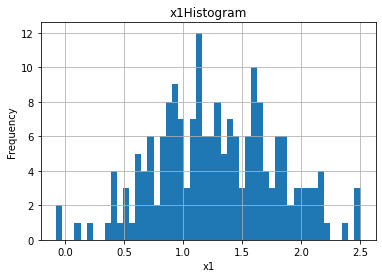

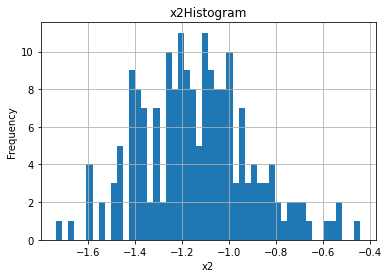

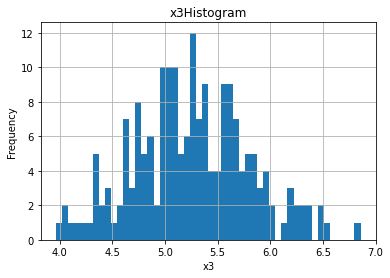

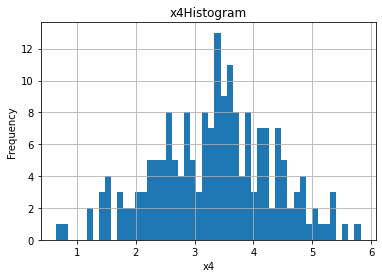

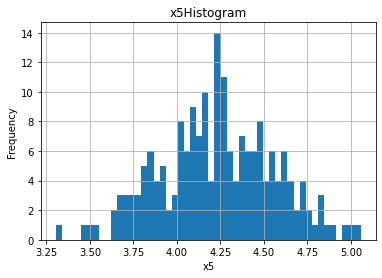

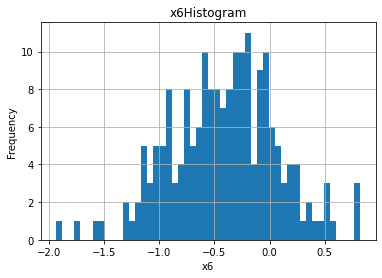

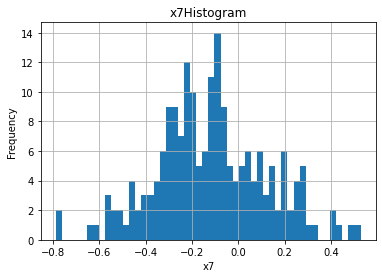

In [5]:
#To visualize the variables since all are continous we are creating histograms to understand their distribution
# So now taking all the features and checking their histograms

for feature in PCA_train_df.columns.values:
    # I chose bin size 50 since it helped me visialize the shape easier.
    PCA_train_df[feature].hist(bins=50)

    plt.xlabel(feature)
    plt.ylabel("Frequency")
    
    plt.title(feature + "Histogram")
    plt.show()
    print()

# **Conclusion**: All the plots seem to be approximately Gaussian.

But, their ranges vary and thus we need to Normalize to zero mean and unit s.d. before using the PCA function.

# Pearson Correlation Heatmap.

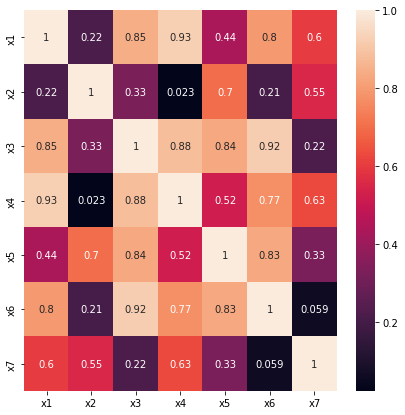

In [6]:
# So I'll be using the most commonly used correlation methon, Pearson's Correlation 
corr_pearson = PCA_train_df.corr(method= 'pearson')

#Now making a heatmap out of it.
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(abs(corr_pearson), annot = True)
plt.show()

# **Conclusion**: From this Pearson correlation heatmap, we can see there does exist quite an amount of correlation amongst the features.
 Evidently:

1. x1 has high correlation with x3, x4 and x6.
2. x2 has high correlation with x5.
3. x3 has high correlation with x4, x5 and x6.
4. x4 has high correlation with x6.
5. x5 has high correlation with x6.



# Now we need not know the nature of correlation, it will be removed during PCA .

# Training PCA on the dataset.


---



# Normalizing the data using standard scaler.

In [7]:
# Normalizing the dataset to a mean 0 and s.d. ±1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(PCA_train_df)

# Training PCA

In [8]:
# I am aiming to capture 95% variation
pca = PCA(0.95)
pca_data = pca.fit_transform(scaled_data)

In [9]:
print (pca_data.shape)

(190, 3)


# Results.


---



#Explained variance vs numbers of PCA dimensions.

In [10]:
dim = list(range(1,pca_data.shape[1]+1))

c = 0
for d in dim:
  print ("Explained Variance for PCA dimension "+str(d)+" is  :"+str(pca.explained_variance_[c]))
  c+=1

Explained Variance for PCA dimension 1 is  :4.287459546750246
Explained Variance for PCA dimension 2 is  :2.248058658613713
Explained Variance for PCA dimension 3 is  :0.45709919270145516


Plotting Them 

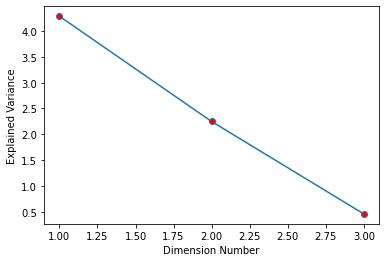

In [11]:
plt.plot(dim,pca.explained_variance_,marker = 'o',markerfacecolor = 'red')
plt.xlabel('Dimension Number')
plt.ylabel('Explained Variance')
plt.show()

# Reconstruction and MSE

In [12]:
# This is for reconstruction to the normalized set
recontructed_scaled = pca.inverse_transform(pca_data)

# This is to the scale and mean of that of the original dataset
reconstructed = scaler.inverse_transform(recontructed_scaled)

# This is the array that contains the eroors of net reconstruction
MSE_list = np.mean(np.square(np.subtract(reconstructed,PCA_train_df.to_numpy())),axis=0)

# c is just for display formatting
c = 0
for col in PCA_train_df.columns.values:
  print ("MSE for feature "+col+" is : "+str(MSE_list[c]))
  c+=1

MSE for feature x1 is : 0.003437822130591167
MSE for feature x2 is : 4.511698747897091e-06
MSE for feature x3 is : 0.0026790935070860594
MSE for feature x4 is : 0.007157068782844121
MSE for feature x5 is : 5.9860660458753435e-05
MSE for feature x6 is : 0.0028900083629569908
MSE for feature x7 is : 8.585002482994675e-05


# Conclusion:

The errors are practically zero or negligible.